In [1]:
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.plots import Hodograph, SkewT
from metpy.units import units
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('sounding.csv')
df

,UTC_Date,UTC_Ti,me,FltTime,Press,Temp,RelHum,WSpeed,WDirn,GPM_AGL,...,Alt_MSL,Long/E,Lat/N,Long/E.1,Lat/N.1,DP,Dens,Ascent,WNorth,WEast
0,NaN,hr:mi,n:s,s,hPa,¬∞C,%,m/s,¬∞,m,...,NaN,m,NaN,NaN,NaN,¬∞C,g/m¬≥,m/min,m/s,m/s
1,----------------,-----------,---,---------------,-------------------,---------------,---------------,---------------,---------------,---------------,...,-----------,-----------------,---------------,-----------------,---------------,---------------,---------------,---------------,---------------,-----------
2,2/2/23,10:32:54,PM,0,1003.19,1.3,32.9,5,200,0,...,76,"073¬∞48'52.8""W","42¬∞40'51.1""N","073¬∞48'52.8""W","42¬∞40'51.1""N",-13.2,1272.4,0,4.7,1.7
3,2/2/23,10:32:55,PM,1,1002.08,1.23,34.19,6.1,179,8.9,...,84.9,"073¬∞48'52.8""W","42¬∞40'51.2""N","073¬∞48'52.8""W","42¬∞40'51.2""N",-12.8,1271.3,347,6.1,-0.1
4,2/2/23,10:32:56,PM,2,1001.34,1.28,34.15,6.3,179,14.8,...,90.8,"073¬∞48'52.8""W","42¬∞40'51.3""N","073¬∞48'52.8""W","42¬∞40'51.3""N",-12.8,1270.1,346,6.3,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,2/2/23,11:30:12,PM,3438,110.14,-56.5,2.53,53.2,273,15322.2,...,15439.2,"071¬∞42'55.1""W","42¬∞41'05.3""N","071¬∞42'55.1""W","42¬∞41'05.3""N",-82.8,177.1,266,-3,53.1
3441,2/2/23,11:30:13,PM,3439,110.07,-56.53,1.74,53.2,273,15326.5,...,15443.6,"071¬∞42'52.8""W","42¬∞41'05.2""N","071¬∞42'52.8""W","42¬∞41'05.2""N",-85.2,177,266,-3,53.1
3442,2/2/23,11:30:14,PM,3440,109.99,-56.55,2.52,53.2,273,15330.9,...,15448,"071¬∞42'50.5""W","42¬∞41'05.1""N","071¬∞42'50.5""W","42¬∞41'05.1""N",-82.9,176.9,266,-2.9,53.1
3443,2/2/23,11:30:15,PM,3441,109.92,-56.57,2.52,53.1,273,15335.3,...,15452.4,"071¬∞42'48.2""W","42¬∞41'05.0""N","071¬∞42'48.2""W","42¬∞41'05.0""N",-82.9,176.8,267,-2.8,53.1


In [3]:
df.drop_duplicates(inplace=True,subset='Press',ignore_index=True)

In [4]:
df = df.drop(labels=[0,1])

In [5]:
df

,UTC_Date,UTC_Ti,me,FltTime,Press,Temp,RelHum,WSpeed,WDirn,GPM_AGL,...,Alt_MSL,Long/E,Lat/N,Long/E.1,Lat/N.1,DP,Dens,Ascent,WNorth,WEast
2,2/2/23,10:32:54,PM,0,1003.19,1.3,32.9,5,200,0,...,76,"073¬∞48'52.8""W","42¬∞40'51.1""N","073¬∞48'52.8""W","42¬∞40'51.1""N",-13.2,1272.4,0,4.7,1.7
3,2/2/23,10:32:55,PM,1,1002.08,1.23,34.19,6.1,179,8.9,...,84.9,"073¬∞48'52.8""W","42¬∞40'51.2""N","073¬∞48'52.8""W","42¬∞40'51.2""N",-12.8,1271.3,347,6.1,-0.1
4,2/2/23,10:32:56,PM,2,1001.34,1.28,34.15,6.3,179,14.8,...,90.8,"073¬∞48'52.8""W","42¬∞40'51.3""N","073¬∞48'52.8""W","42¬∞40'51.3""N",-12.8,1270.1,346,6.3,-0.1
5,2/2/23,10:32:57,PM,3,1000.67,1.3,30.75,6.4,179,20.2,...,96.2,"073¬∞48'52.8""W","42¬∞40'51.5""N","073¬∞48'52.8""W","42¬∞40'51.5""N",-14.1,1269.3,344,6.4,-0.1
6,2/2/23,10:32:58,PM,4,1000,1.31,30.82,6.5,179,25.6,...,101.6,"073¬∞48'52.8""W","42¬∞40'51.7""N","073¬∞48'52.8""W","42¬∞40'51.7""N",-14,1268.4,342,6.5,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,2/2/23,11:30:12,PM,3438,110.14,-56.5,2.53,53.2,273,15322.2,...,15439.2,"071¬∞42'55.1""W","42¬∞41'05.3""N","071¬∞42'55.1""W","42¬∞41'05.3""N",-82.8,177.1,266,-3,53.1
3441,2/2/23,11:30:13,PM,3439,110.07,-56.53,1.74,53.2,273,15326.5,...,15443.6,"071¬∞42'52.8""W","42¬∞41'05.2""N","071¬∞42'52.8""W","42¬∞41'05.2""N",-85.2,177,266,-3,53.1
3442,2/2/23,11:30:14,PM,3440,109.99,-56.55,2.52,53.2,273,15330.9,...,15448,"071¬∞42'50.5""W","42¬∞41'05.1""N","071¬∞42'50.5""W","42¬∞41'05.1""N",-82.9,176.9,266,-2.9,53.1
3443,2/2/23,11:30:15,PM,3441,109.92,-56.57,2.52,53.1,273,15335.3,...,15452.4,"071¬∞42'48.2""W","42¬∞41'05.0""N","071¬∞42'48.2""W","42¬∞41'05.0""N",-82.9,176.8,267,-2.8,53.1


In [6]:
P = df['Press'].values * units('hPa')
T = df['Temp'].values * units('degC')
Td = df['DP'].values * units('degC')

In [7]:
p_units=units('hPa')

In [8]:
pTop = 100
pBot = 1050
tMin = -60
tMax = 10

In [9]:
logTop = np.log10(pTop)
logBot = np.log10(pBot)
interval = np.logspace(logTop,logBot) * p_units

Text(0.5, 1.0, 'ETEC Sounding Temperature and Dewpoint (degC) 20220202 2153 UTC')

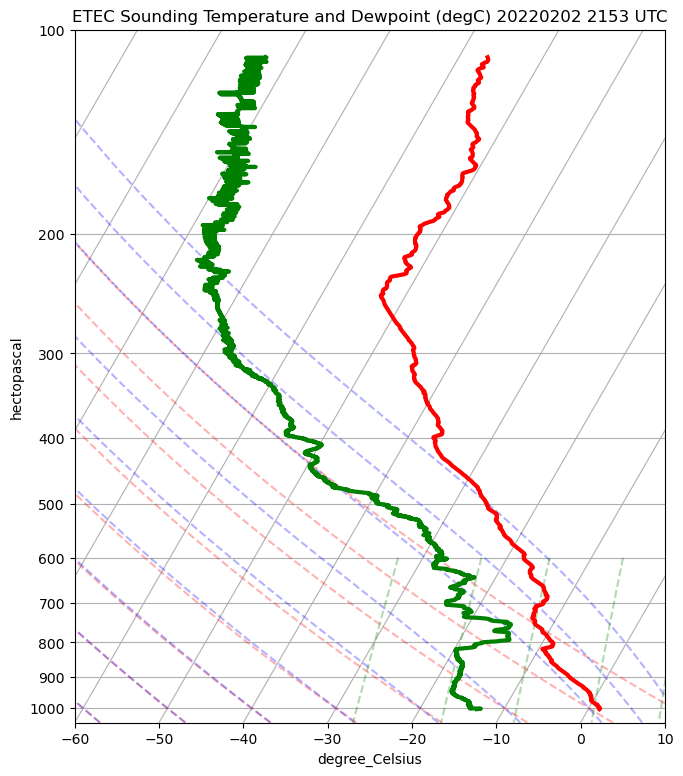

In [17]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=30)
skew.ax.set_ylim(pBot, pTop)
skew.ax.set_xlim(tMin, tMax)
skew.plot(P, T, 'r', linewidth=3)
skew.plot(P, Td, 'g', linewidth=3)
skew.plot_dry_adiabats(alpha=.3)
skew.plot_moist_adiabats(alpha=.3)
skew.plot_mixing_lines(alpha=.3)

plt.title('ETEC Sounding Temperature and Dewpoint (degC) 20220202 2153 UTC')